In [6]:
# Install Magnitude on Google Colab
! echo "Installing Magnitude.... (please wait, can take a while)"
! (curl https://raw.githubusercontent.com/plasticityai/magnitude/master/install-colab.sh | /bin/bash 1>/dev/null 2>/dev/null)
! echo "Done installing Magnitude.

Installing Magnitude.... (please wait, can take a while)
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   137  100   137    0     0    840      0 --:--:-- --:--:-- --:--:--   840
/bin/bash: -c: line 0: unexpected EOF while looking for matching `"'
/bin/bash: -c: line 1: syntax error: unexpected end of file


In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [7]:
from pymagnitude import *
file_path = "/content/drive/MyDrive/GoogleNews-vectors-negative300.magnitude"
vectors = Magnitude(file_path)

In [8]:
vectors.distance("cat","dog")

0.69145405

### 1. What is the dimensionality of these word embeddings? Provide an integer answer.

In [9]:
vectors.dim

300

### 2. What are the top-5 most similar words to picnic (not including picnic itself)?

In [10]:
vectors.most_similar("picnic", topn = 5)

[('picnics', 0.7400875),
 ('picnic_lunch', 0.721374),
 ('Picnic', 0.700534),
 ('potluck_picnic', 0.6683274),
 ('picnic_supper', 0.65189123)]

In [11]:
vectors.similarity("Picnic", "picnic")

0.70053405

In [12]:
vectors.most_similar(vectors.query("picnic"), topn = 6)

[('picnic', 0.9999998),
 ('picnics', 0.7400875),
 ('picnic_lunch', 0.721374),
 ('Picnic', 0.700534),
 ('potluck_picnic', 0.6683274),
 ('picnic_supper', 0.65189123)]

The top-5 most similar words to "picnic are picnics, picnic_lunch,Picnic,potluck_picnic,picnic_supper.

### 3. According to the word embeddings, which of these words is not like the others? ['tissue', 'papyrus', 'manila', 'newsprint', 'parchment', 'gazette']

In [13]:
vectors.doesnt_match(['tissue', 'papyrus','manila', 'newsprint', 'parchment', 'gazette']) 

'tissue'

### 4. Solve the following analogy: leg is to jump as X is to throw.

In [14]:
vectors.most_similar(positive = ["leg", "throw"], negative = ["jump"]) 

[('forearm', 0.48294652),
 ('shin', 0.47376165),
 ('elbow', 0.4679689),
 ('metacarpal_bone', 0.46781474),
 ('metacarpal_bones', 0.46605822),
 ('ankle', 0.46434426),
 ('shoulder', 0.46183354),
 ('thigh', 0.45393682),
 ('knee', 0.4455707),
 ('ulna_bone', 0.4423491)]

In [51]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [66]:
def word_visual(word_list):
  i = 1
  pca = PCA(n_components=2)
  for word in word_list:
    vq = vectors.query(word)
    if i <= 1:
      vec = vectors.query(word)
      i += 1
    else:
      vec = np.vstack((vec, vq))
  
  fit = pca.fit_transform(vec)
  x = fit[:,0]
  y = fit[:,1]
  axs = plt.subplot(1,1,1)
  for j in range(len(word_list)):
    axs.text(x[j],y[j],word_list[j])
  axs.scatter(x,y)

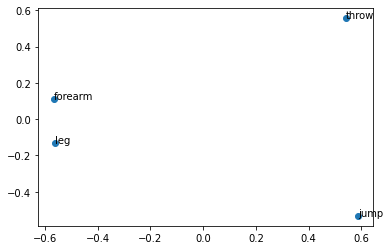

In [68]:
word_list = ['leg','throw','jump','forearm']
word_visual(word_list)

leg is to jump as forearm is to throw

In [69]:
#word_list = ['tissue', 'papyrus','manila', 'newsprint', 'parchment', 'gazette']

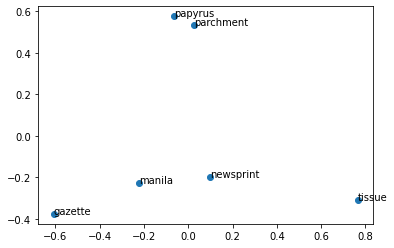

In [70]:
#word_visual(word_list)

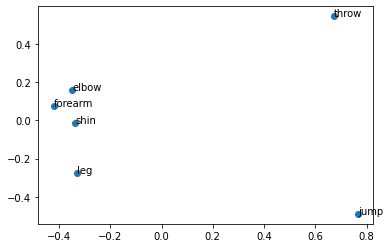

In [71]:
#word_list = ['leg','throw','jump','forearm','shin','elbow']
#word_visual(word_list)